<a href="https://colab.research.google.com/github/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_2/Projeto_modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução
Seja bem-vindo e/ou bem-vinda ao meu notebook do projeto/super-desafio do módulo 2!

Nesse módulo apronfudamos na manipulação e visualização de dados que aprendemos no módulo 1. Conhecemos bibliotecas para lidar com formatos de datas, aprendemos formas diferentes de unir vários datasets; e principalmente novas ferramentas gráficas como o _seaborn_ que nos permitem ir mais além em análises exploratórias de qualidade.

# Tema: vacinas!

Se você já passeou pelo meu [projeto do módulo 1](https://github.com/RPGraciotti/BootCampAlura/blob/main/Projeto_modulo_1/Projeto.ipynb), viu que eu já havia trabalhado com dados de vacinas do Tabnet/Datasus. Lá discutimos coisas interessantes, chamando a atenção a aparente [queda](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/) nos índices de vacinação e o quanto isso tem nos preocupado. Dessa vez, escolhi olhar para algumas doenças específicas, para as quais contamos com vacinas disponíveis no nosso [PNI - Plano Nacional de Imunizações](http://pni.datasus.gov.br/).

## Doenças que diminuem a qualidade de vida
Um relatório publicado na revista médica [The Lancet](https://www.thelancet.com/journals/lancet/home), aponta que infecções do [trato respiratório](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(16)31678-6/fulltext#seccestitle200) são as causas mais comuns de perda de qualidade de vida, mesmo que não sejam as [maiores causadoras de mortes](https://www.paho.org/pt/noticias/9-12-2020-oms-revela-principais-causas-morte-e-incapacidade-em-todo-mundo-entre-2000-e). Em tempos [de COVID-19](https://www.paho.org/bra/dmdocuments/covid-19-materiais-de-comunicacao-1/Alerta%20epidemiologico%20-%20Complicacoes%20e%20sequelas%20da%20COVID-19.pdf), isso levanta um alerta sobre os riscos de possíveis sequelas que a doença deixa em pessoas infectadas. Sequelas no trato respiratório e sistema cardiovascular são especialmente preocupantes, pois doenças cardíacas ainda são as [maiores causas de morte no mundo](https://www.paho.org/pt/noticias/9-12-2020-oms-revela-principais-causas-morte-e-incapacidade-em-todo-mundo-entre-2000-e). 

## Doenças do trato respiratório
A [Tuberculose](https://saude.abril.com.br/medicina/tuberculose-o-que-e-sintomas-tipos-tratamentos-e-como-e-a-transmissao/) é uma infecção bacteriana do trato respiratório, [potencialmente fatal se evoluir para um caso agudo](https://en.wikipedia.org/wiki/Tuberculosis). Os maiores riscos para a tuberculose estão associados com o hábito de fumar, e infecção pelo HIV e desenvolvimento de um quadro de AIDS. É uma doença especialmente preocupante regiões do Sudeste Asiático e da África.
Existe vacina para a tuberculose, a [BCG](https://meucalendariodevacinas.com.br/educacao/bcg/), aplicada idealmente ao nascer e responsável por aquela famosa "marquinha" da vacina que temos no braço direito. Como veremos adiante, é uma das vacinas de maior sucesso em campanhas brasileiras. Entretanto, a tuberculose *ainda é* uma doença de grande importância, devido aos fatores discutidos, e ainda [mata pessoas](https://saude.abril.com.br/medicina/campanha-alerta-para-a-tuberculose-que-ainda-mata-milhares-por-dia/) no Brasil. 

A [Coquelueche](https://www.bio.fiocruz.br/index.php/br/coqueluche-sintomas-transmissao-e-prevencao) ou Pertussis, também uma infecção bacteriana do trato respiratório que também chama a atenção por ser mais severa em [recém-nascidos](https://en.wikipedia.org/wiki/Whooping_cough#Prognosis). Também é uma doença para a qual temos a prevenção por uma vacina (e, veremos que por outras combinações mais recentes) de ampla aplicação no Brasil, a [DTP](https://meucalendariodevacinas.com.br/educacao/dtp-dtpa/), aplicada a primeira dose em crianças menores de um ano.

## Tetano

O [Tétano](https://www.bio.fiocruz.br/index.php/br/tetano-sintomas-transmissao-e-prevencao#:~:text=O%20t%C3%A9tano%20%C3%A9%20uma%20infec%C3%A7%C3%A3o,um%20indiv%C3%ADduo%20para%20o%20outro.) é outra infecção bacteriana a qual pode ser evitada com a vacina DTP. Escolhi investigar um pouco a fundo essa doença pois ela possui [altíssima mortalidade](https://en.wikipedia.org/wiki/Tetanus), pelo menos 10% dos casos podem ser fatais! A prevalência do Tétano no Brasil requer um acompanhamento mais a fundo, pois há a necessidade de reaplicação das vacinas anti-tetânicas ao longo da vida, pois a infeção [não confere imunidade](https://www.who.int/news-room/fact-sheets/detail/tetanus).

### Dado o histórico aqui apresentado de algumas doenças não erradicadas, para as quais temos vacinas, vamos olhar mais a fundo para os seus quadros no Brasil?

# Carregamento de bibliotecas e importação dos dados :

Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.patches as mpatches
import seaborn as sns

# Origem dos dados: Tabnet/Datasus

Para as análises dos quadros dessas doenças no Brasil, realizei buscas nas bases de [índices de cobertura vacinal](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11637), doenças e agravos de notificação (que estão dividos em dois grupos, [2001 - 2006](http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=30009921) e [2007 em diante](http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=29878153)), e um banco de dados específico sobre [Tuberculose](http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=31009407). Nos bancos de dados sobre doenças e agravos, e casos de tuberculose, é possível buscar o total de casos das doenças selecionadas e incluir informação sobre a evolução dos casos (se resultaram em morte ou cura, por exemplo), ao longo dos anos. Busquei então esses índices para as três doenças comentadas, Tuberculose, Coqueluche e Tétano. 

Nos índices de cobertura vacinal, foi possível discriminar os diferentes tipos de imunizantes aplicados, ao longo da série temporal. O índice de cobertura vacinal é [calculado](http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf) com base no número de crianças vacinadas / número de crianças da idade alvo das campanhas para cada imunizante.

Leitura das tabelas

In [2]:
cob_im_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/cobertura_imuno_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",")
cob_im_ano.drop(" Total", axis = 1, inplace = True)

tub_evo_ano = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tuberculose_evo_ano.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                              skipfooter = 18, engine = "python")
tub_evo_ano.drop("Total", axis = 1, inplace = True)
tub_evo_ano = tub_evo_ano.rename(columns = {"Situação Encerra.":"Evolução"})
tub_evo_ano.iloc[:,1:] = tub_evo_ano.iloc[:,1:].replace(r"-", "0").astype(int)

tub_evo_eta = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tuberculose_evo_etaria.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 18, engine = "python")
tub_evo_eta.drop(["Em branco/IGN","Total"], axis = 1, inplace = True)
tub_evo_eta = tub_evo_eta.rename(columns = {"Situação Encerra.":"Evolução"})
tub_evo_eta.iloc[:,1:] = tub_evo_eta.iloc[:,1:].replace(r"-", "0").astype(int)

coq_evo_ano1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_ano_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
coq_evo_ano1.drop("Total", axis = 1, inplace = True)
coq_evo_ano1 = coq_evo_ano1.rename(columns = {"Evolução caso":"Evolução"})

coq_evo_ano2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_ano_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 14, engine = "python")
coq_evo_ano2 = coq_evo_ano2.iloc[:, np.r_[0:1, 11:25]]
coq_evo_ano2 = coq_evo_ano2.replace(r"Óbito pelo agravo notificado", "Óbito")

coq_evo_eta1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_etaria_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
coq_evo_eta1.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
coq_evo_eta1 = coq_evo_eta1.rename(columns = {"Evolução caso":"Evolução"})
coq_evo_eta1.iloc[:,1:] = coq_evo_eta1.iloc[:,1:].replace(r"-", "0").astype(int)
                                                                            
coq_evo_eta2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/coqueluche_evo_etaria_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 14, engine = "python")
coq_evo_eta2.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
coq_evo_eta2 = coq_evo_eta2.replace(r"Óbito pelo agravo notificado", "Óbito")
coq_evo_eta2.iloc[:,1:] = coq_evo_eta2.iloc[:,1:].replace(r"-", "0").astype(int)

tet_evo_ano1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_ano_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
tet_evo_ano1.drop("Total", axis = 1, inplace = True)
tet_evo_ano1 = tet_evo_ano1.rename(columns = {"Evolução do caso":"Evolução"})

tet_evo_ano2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_ano_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 20, engine = "python")
tet_evo_ano2 = tet_evo_ano2.iloc[:, np.r_[0, 5:19]]
tet_evo_ano2 = tet_evo_ano2.replace(r"Óbito pelo agravo notificado", "Óbito")

tet_evo_eta1 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_etaria_1.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 12, engine = "python")
tet_evo_eta1.drop(["Em branco/IGN", "Total"], axis = 1, inplace=True)
tet_evo_eta1 = tet_evo_eta1.rename(columns = {"Evolução do caso":"Evolução"})
tet_evo_eta1.iloc[:,1:] = tet_evo_eta1.iloc[:,1:].replace(r"-", "0").astype(int)

                                                                            
tet_evo_eta2 = pd.read_csv("https://raw.githubusercontent.com/RPGraciotti/BootCampAlura/main/Data/tetano_evo_etaria_2.csv",
                              encoding = "ISO-8859-1", sep = ";", decimal = ",", skiprows = 3,
                          skipfooter = 20, engine = "python")
tet_evo_eta2.drop("Total", axis = 1, inplace=True)
tet_evo_eta2 = tet_evo_eta2.replace(r"Óbito pelo agravo notificado", "Óbito")
tet_evo_eta2.iloc[:,1:] = tet_evo_eta2.iloc[:,1:].replace(r"-", "0").astype(int)


Após lidos e filtrados problemas de falta dos dados, colunas com total geradas automaticamente, e padronização de nomes de linhas e colunas, foi necessário juntar as bases de dados de 2001-2006/2007-2020 para os casos de Tétano e Coqueluche, a princípio separadas. Também foi necessário transformar o formato de tabelas para a posterior visualização gráfica:

In [3]:
cob_ano = cob_im_ano.set_index("Imuno").T

tub_ano = tub_evo_ano.set_index("Evolução").T
tub_eta = tub_evo_eta.set_index("Evolução").T

coq_evo_ano = pd.concat([coq_evo_ano1, coq_evo_ano2]).groupby("Evolução").sum().reset_index()
coq_evo_eta = pd.concat([coq_evo_eta1, coq_evo_eta2]).groupby("Evolução").sum().reset_index()
coq_ano = coq_evo_ano.set_index("Evolução").T
coq_eta = coq_evo_eta.set_index("Evolução").T

tet_evo_ano = pd.concat([tet_evo_ano1, tet_evo_ano2]).groupby("Evolução").sum().reset_index()
tet_evo_eta = pd.concat([tet_evo_eta1, tet_evo_eta2]).groupby("Evolução").sum().reset_index()
tet_ano = tet_evo_ano.set_index("Evolução").T
tet_eta = tet_evo_eta.set_index("Evolução").T

# Análises

Seguiremos então para a análise dos principais pontos discutidos:
- Análise dos índices de cobertura vacinal da BCG;
- Série temporal de casos de tuberculose por evolução da doença, e análise de faixas etárias;
- Possíveis correlações entre cobertura vacinal e mortalidade/casos totais;


- Cobertura da DTP e conjugadas/substitutas;
- Análise das séries temporais por evolução do caso e faixa etária de coqueluche e tétano.

# Tuberculose

A vacina BCG é uma vacina de dose única, aplicada preferencialmente no momento do nascimento. A BCG possui uma [meta](https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf) de cobertura de 90%, isto é, objetiva-se que a cada ano, sejam vacinadas 90% das crianças da idade-alvo. Entretanto, veremos que há **limitações** na forma como esse índice é calculado:

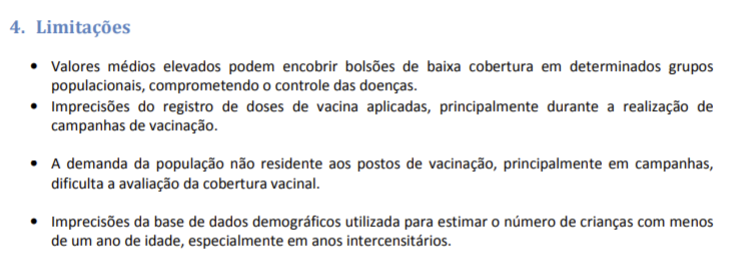

Isso gera situações no mínimo curiosas, em que a cobertura vacinal é > 100%. Diversos fatores estão envolvidos, como apresentados pelo próprio resumo da Tabnet/Datasus acima. Podemos assumir então, que nos períodos em que temos cobertura > 100%, foi atingido **pelo menos** o percentual de 90% estipulado como meta.

Vamos olhar então a série temporal de cobertura da BCG:

**Nota: Como os dados de casos notificados das doenças somente estão disponíveis a partir de 2001, embora tenhamos dados de cobertura vacinal desde 1994, examinaremos apenas os dados de cobertura a partir de 2001.**

In [4]:
BCG = cob_im_ano.query("Imuno == 'BCG'").melt(id_vars = "Imuno").rename(columns = str.title)

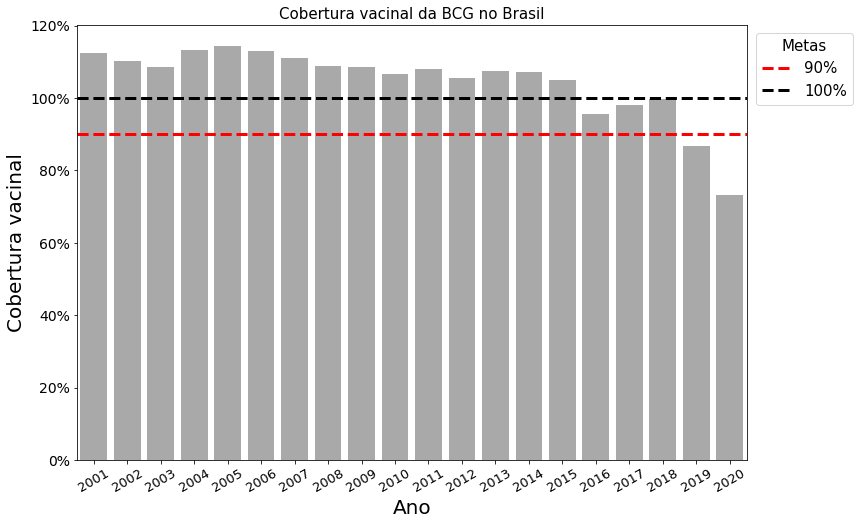

In [5]:
plt.figure(figsize = (12,8))
plt.title("Cobertura vacinal da BCG no Brasil", fontsize = 15)
ax = sns.barplot(data = BCG.iloc[7:,], x = "Variable", y = "Value", color = "darkgrey")
plt.ylabel("Cobertura vacinal", fontsize = 20)
plt.xlabel("Ano", fontsize = 20)
ax.tick_params(axis = "x", which = "major", labelsize = 13)
ax.tick_params(axis = "y", which = "major", labelsize = 14)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.xticks(rotation = 30)
plt.axhline(y = 90, color = "red", linestyle = "--", lw = 3, label = "90%")
plt.axhline(y = 100, color = "black", linestyle = "--", lw = 3, label = "100%")
plt.legend(bbox_to_anchor = (1.17,1), fontsize = 15, title = "Metas", title_fontsize = 15)

plt.show()

Como previsto, temos que em *grande parte* da nossa série temporal, os índices de vacinação estão acima dos 100%. Eu, Rodolfo, suspeito que para a BCG esse dado se apresente comumente dessa forma porque é uma vacina preferencialmente aplicada no nascimento. Dessa forma, temos que, como o percentual é calculado com base nas aplicações e número de nascimentos, pode haver uma defasagem entre esses dois indicadores. Quando compilados no tabnet, as limitações apresentadas dificultam esse cruzamento de informações. Talvez a mortalidade de crianças menores de 1 ano afeta esses indicadores? É uma questão interessante a ser discutida.

Nos últimos 5 anos, vemos uma redução dos índices de cobertura, embora ainda maiores que a meta de 90%. Porém, no ano de 2019 temos pela primeira vez uma queda abaixo dos 90% na nossa série temporal, levantando um alerta, já discutido no módulo 1, sobre a [queda](https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/) nos índices de vacinação no Brasil em anos recentes. Para o ano de 2020, sempre temos que considerar que a pandemia de COVID-19 pode influenciar os valores: a necessidade de isolamento social, e colapso dos sistemas de saúde pode [dificultar](https://www.em.com.br/app/noticia/bem-viver/2020/07/07/interna_bem_viver,1163194/em-meio-a-pandemia-pais-deixam-de-vacinar-os-filhos.shtml) o sucesso das campanhas de vacinação.

Vimos então como a cobertura vacinal da BCG tem tido sucesso no Brasil. Porém, podemos nos perguntar: isso levou a uma diminuição dos casos de tuberculose? Uma diminuição no número de mortes? Veremos a série histórica de casos de tuberculose, de acordo com a evolução da doença:


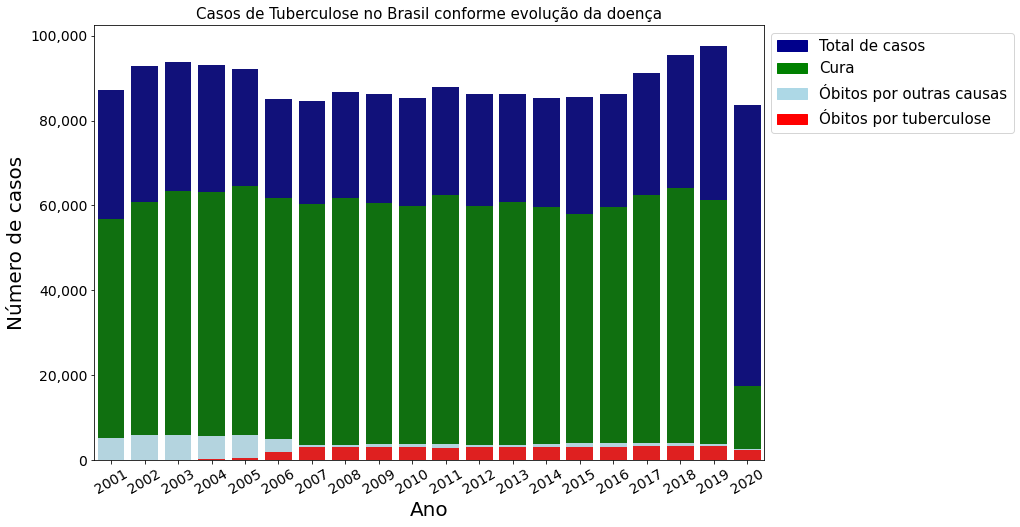

In [6]:
plt.figure(figsize = (12, 8))
plt.title("Casos de Tuberculose no Brasil conforme evolução da doença", fontsize = 15)
bar1 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Cura", color = "green")
bar3 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Óbito por outras causas", color = "lightblue")
bar4 = sns.barplot(data = tub_ano, x = tub_ano.index, y = "Óbito por tuberculose", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Ano", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

# legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "green", label = "Cura")
b3 = mpatches.Patch(color = "lightblue", label = "Óbitos por outras causas")
b4 = mpatches.Patch(color = "red", label = "Óbitos por tuberculose")
plt.legend(handles = [b1,b2,b3,b4], bbox_to_anchor = (1,1), fontsize = 15)

plt.show()

O que é importante entendermos desse gráfico? Vemos que, primeiro, a tuberculose ainda é uma doença frequente no Brasil. Temos uma média de 80000 casos todo ano. Segundo, ela é reportada com diversas possíveis evoluções: 



In [7]:
tub_ano.columns

Index(['Ign/Branco', 'Cura', 'Abandono', 'Óbito por tuberculose',
       'Óbito por outras causas', 'Transferência', 'TB-DR',
       'Mudança de Esquema', 'Falência', 'Abandono Primário', 'Total'],
      dtype='object', name='Evolução')

Cura, a morte pela doença, ou morte por outras causas associadas, abandono do tratamento, desenvolvimento de variantes resistentes a drogas [(TB-DR)](https://www.msf.org.br/noticias/manifesto-de-tb-dr-e-entregue-na-assembleia-mundial-da-saude#:~:text=Na%20v%C3%A9spera%20de%20a%20Assembleia,melhoria%20de%20testes%20e%20cuidados), entre outros. Como a mortalidade de tuberculose está associada com casos de [HIV/AIDS](https://www.thelancet.com/journals/lanceAt/article/PIIS0140-6736(16)31678-6/fulltext#seccestitle200)), escolhi mostrar esse dado. 

A mortalidade por tuberculose não é desprezível, e, inclusive, parece ter aumentado nos anos iniciais da nossa série temporal. 

Outro dado relevante para se analisar o quadro da tuberculose no Brasil, é a evolução de casos, por faixa etária, dos dados de 2001-2020:

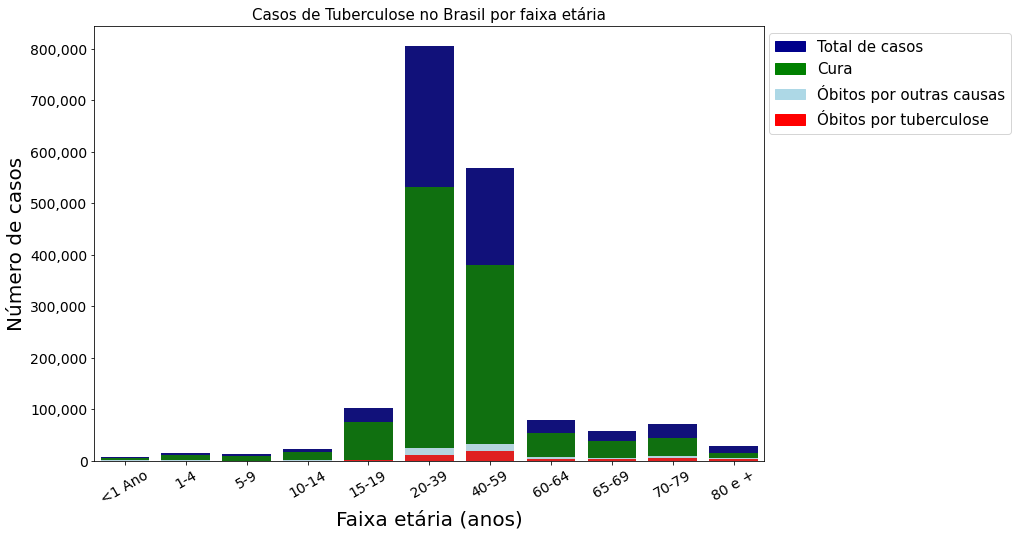

In [8]:
plt.figure(figsize = (12,8))
plt.title("Casos de Tuberculose no Brasil por faixa etária", fontsize = 15)
bar1 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Cura", color = "green")
bar3 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Óbito por outras causas", color = "lightblue")
bar4 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Óbito por tuberculose", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Faixa etária (anos)", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

#legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "green", label = "Cura")
b3 = mpatches.Patch(color = "lightblue", label = "Óbitos por outras causas")
b4 = mpatches.Patch(color = "red", label = "Óbitos por tuberculose")
plt.legend(handles = [b1,b2,b3,b4], bbox_to_anchor = (1.38,1), fontsize = 15)

plt.show()

Podemos ver que a doença é muito mais frenquente nas faixas de 20-39 e 40-59 anos. O maior risco associado com o hábito de fumar, e infecção por HIV pode estar por trás dessa prevalência nessas faixas etárias, por exemplo. 

Se isolarmos o número de mortes, veremos que o padrão de prevalência nessas taxas se mantém:

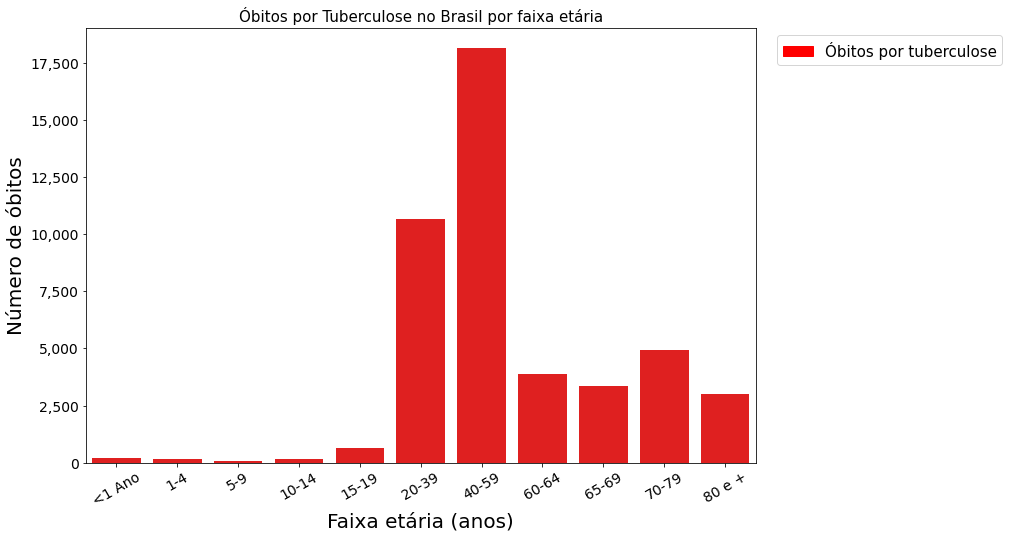

In [9]:
plt.figure(figsize = (12,8))
plt.title("Óbitos por Tuberculose no Brasil por faixa etária", fontsize = 15)
bar1 = sns.barplot(data = tub_eta, x = tub_eta.index, y = "Óbito por tuberculose", color = "red")
plt.ylabel("Número de óbitos", fontsize = 20)
plt.xlabel("Faixa etária (anos)", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

#legenda
b1 = mpatches.Patch(color = "red", label = "Óbitos por tuberculose")
plt.legend(handles = [b1], bbox_to_anchor = (1.38,1), fontsize = 15)

plt.show()

O que poderia estar por trás desses indicadores? 

Uma discussão importe: as vacinas geralmente não impedem a infecção, mas sim a evolução de doenças para quadros graves. Isso vemos em várias vacinas, a exemplo das vacinas contra COVID-19 que estão em alta. No caso da BCG, o maior impactante é a perspectiva de vacinação em massa, que freia o contágio em larga escala. Porém, cada pessoa não estará individualmente imune ao longo da vida, especialmente no caso da BCG, em que não há evidência que [reforços](https://www.scielo.br/j/jped/a/TCg8DMtnxLMtRfRvFb5QxZs/?lang=pt) aumentariam imunidade. Portanto, a situação da tuberculose ainda é de extrema importância para a saúde global, também tendo-se em mente a possibilidade do desenvolvimento de [variantes resistentes aos tratamentos antibióticos atuais](https://pebmed.com.br/tuberculose-resistente-definicao-e-acoes-de-combate/).

Por último, podemos testar se há associações dos índices de cobertura vacinal da BCG com as taxas de infecção/óbito de tuberculose; examinando como varia o número de casos/óbitos em função da cobertura:

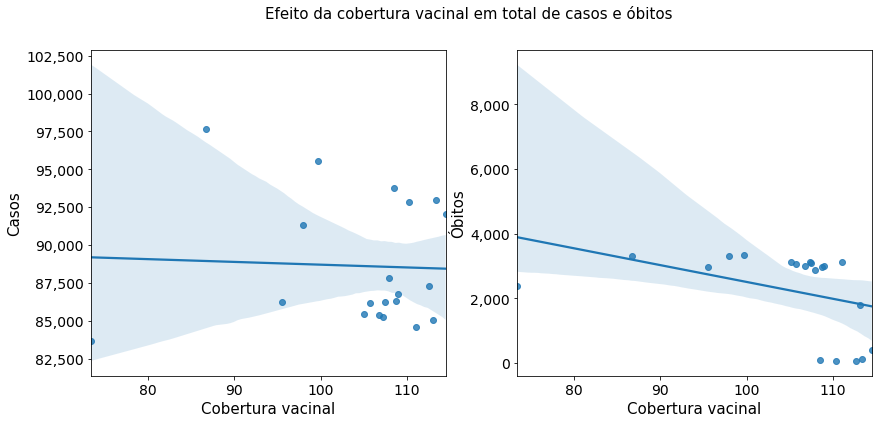

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))
fig.suptitle("Efeito da cobertura vacinal em total de casos e óbitos", fontsize = 15)
sns.regplot(x = cob_ano.loc[:,"BCG"][7:], y = tub_ano.loc[:, "Total"], ax = ax[0])
ax[0].set_ylabel("Casos", fontsize = 15)
ax[0].set_xlabel("Cobertura vacinal", fontsize = 15)
ax[0].tick_params(axis = "both", which = "major", labelsize = 14)
ax[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
sns.regplot(x = cob_ano.loc[:,"BCG"][7:], y = tub_ano.loc[:, "Óbito por tuberculose"], ax = ax[1])
ax[1].set_ylabel("Óbitos", fontsize = 15)
ax[1].set_xlabel("Cobertura vacinal", fontsize = 15)
ax[1].tick_params(axis = "both", which = "major", labelsize = 14)
ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
fig.show()

Através destes gráficos de dispersão que descrevem como o número de casos/óbitos varia em função das taxas de cobertura vacinal, esperaríamos encontrar relações negativas: quanto maior a cobertura, menor número de casos e/ou óbitos.

Não parece haver esse efeito para o número de casos, e, inclusive, discutimos isso anteriormente: esperamos que haja maior efeito no número de óbitos, pois a vacina evitaria a evolução para quadros graves. Nesse caso, parece haver a relação esperada.
Porém, cabe ressaltar que essa análise é bastante limitada. Primeiro que estamos fazendo apenas uma inspeção visual, sem que fosse aplicado um modelo de regressão, analisando-se os parâmetros do modelo, etc. Segundo, como vimos, os dados de cobertura vacinal são potencialmente "inflacionados" com valores maiores que >100%, o que reflete a existência de erros e/ou incoscistências na base de dados. A série temporal analisada também relativamente pequena, 20 anos, para que se possa fazer afirmações mais concretas. Devido a esses fatores, e mais um fator que discutiremos mais para frente, optei não tirar conclusões concretas dessa análise e não a repeti para as próximas doenças analisadas.

# Coqueluche

A coqueluche, ou pertussis, é outra infecção respiratória cuja prevenção é através de uma vacina disponível no PNI, a Tríplice Bacteriana, conhecida como DTP. A DTP foi desenvolvida para imunizar contra 3 doenças bacterianas: a **D**ifteria (sobre a qual não falaremos aqui), o **T**étano e a **P**ertussis (coqueluche). A vacina DTP também faz parte de outras combinações de vacinas aplicadas no Brasil:
- Vacina Tetravalente (que combina a DTP com a vacina contra infecções da bactéria *Haemophilus influenzae* do tipo B, que provoca meningite);
- [Pentavalente](https://beepsaude.com.br/vacinas/vacina-pentavalente/) (que combina a tetravalente com VIP, que protege contra poliomielite).
- Um reforço conhecido como DT, duplo adulto, que protege somente contra difteria e tétano.

Veremos também que as informações sobre a cobertura dessa vacina e suas conjugadas é cheia de redundâncias e imprecisões na base tabnet/datasus, com informações faltantes sobre a aplicação de doses de reforço, por exemplo.

De qualquer forma, vamos olhar então para a série temporal da cobertura da DTP e vacinas associadas:


In [11]:
vacs = ["Penta", "DTP", "DTP REF (4 e 6 anos)","Tríplice Bacteriana(DTP)(1º ref)", "Dupla adulto e tríplice acelular gestante", "Tetravalente (DTP/Hib) (TETRA)"]
vacs = cob_im_ano.iloc[:,np.r_[0,8:28]].query("Imuno in @vacs").melt(id_vars = "Imuno").rename(columns = str.title)

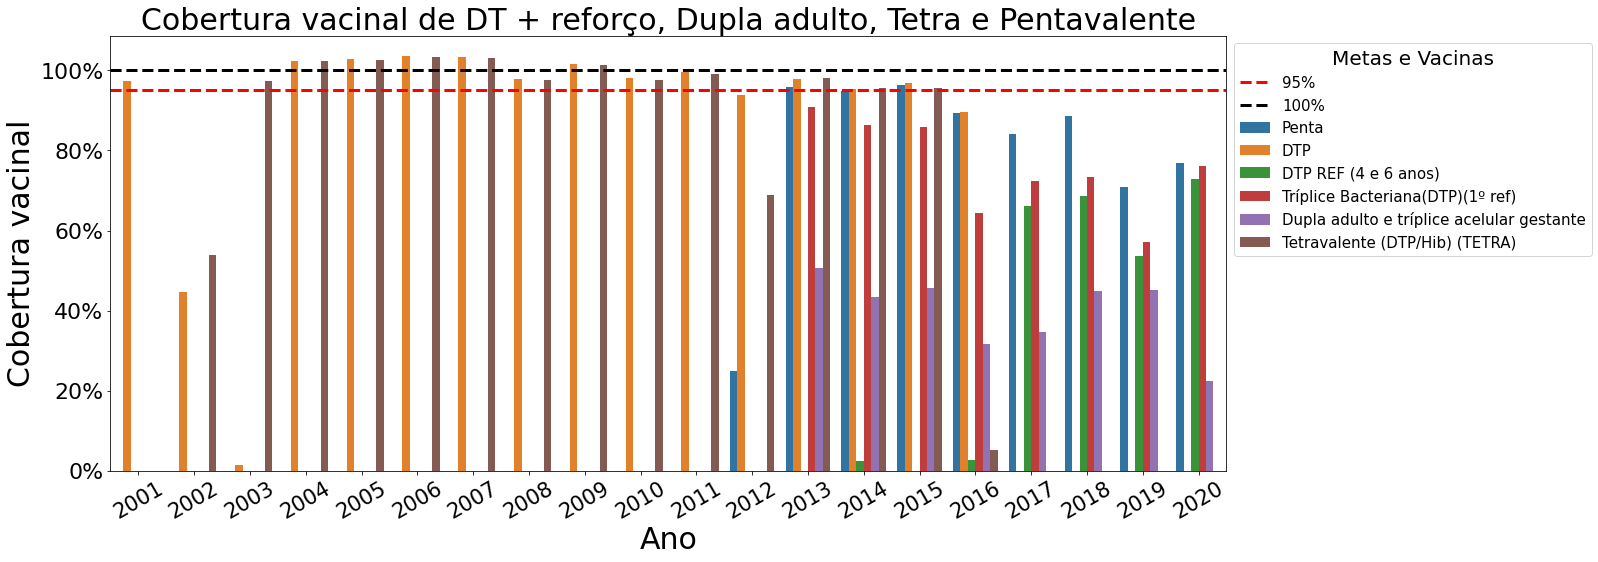

In [12]:
plt.figure(figsize = (20, 8))
plt.title("Cobertura vacinal de DT + reforço, Dupla adulto, Tetra e Pentavalente", fontsize = 30)
ax = sns.barplot(data = vacs, x = "Variable", y = "Value", hue = "Imuno", 
                 palette = sns.color_palette("tab10"))
plt.ylabel("Cobertura vacinal", fontsize = 30)
plt.xlabel("Ano", fontsize = 30)
ax.tick_params(axis = "x", which = "major", labelsize = 21)
ax.tick_params(axis = "y", which = "major", labelsize = 22)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.xticks(rotation = 30)
plt.axhline(y = 95, color = "red", linestyle = "--", lw = 3, label = "95%")
plt.axhline(y = 100, color = "black", linestyle = "--", lw = 3, label = "100%")
plt.legend(bbox_to_anchor = (1,1), fontsize = 15, title = "Metas e Vacinas", title_fontsize = 20)

plt.show()

Para a DTP, temos uma meta maior, de [95%](https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf), que infelizmente, podemos ver que:

- A cobertura tanto da DTP quanto Tetravelente ficou abaixo de 95% em alguns momentos;
- Não temos dados claros para DTP e Tetra nos últimos 4 anos.

Seria um indicativo de que elas estariam sendo substituídas completamente pela Pentavalente? Difícil saber, teríamos que destrinchar melhor esses dados do tabnet/datasus sobre a combinação/redundância dessas informações. Quando temos dados sobre a cobertura da pentavalente junto tetra e DTP, vemos que elas atingem as metas; porém nos últimos anos, com a ausência de dados da DTP e tetra, também parece haver queda na penta. Estariam todas caindo devido a falta nos dados? Seria um decréscimo real da aplicação dessas vacinas? 

Podemos examinar as séries históricas da Coqueluche e do Tétano para levantar alguns possíveis caminhos para essas perguntas:

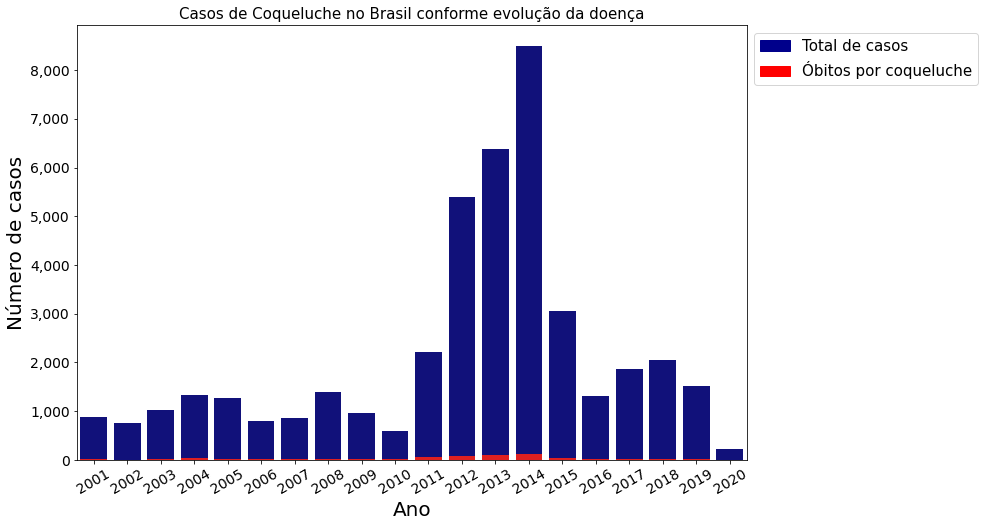

In [13]:
plt.figure(figsize = (12, 8))
plt.title("Casos de Coqueluche no Brasil conforme evolução da doença", fontsize = 15)
bar1 = sns.barplot(data = coq_ano, x = coq_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = coq_ano, x = coq_ano.index, y = "Óbito", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Ano", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

# legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "red", label = "Óbitos por coqueluche")
plt.legend(handles = [b1,b2], bbox_to_anchor = (1,1), fontsize = 15)

plt.show()

**Nota: os dados sobre evolução da doença tanto para coqueluche quanto para tétano reportam apenas óbito/óbito por outras causas/cura/ignorado. Como nesses casos, não há mortalidade associada a outros fatores como há para a tuberculose, e o número de óbitos por outras causas é normalmente menor que pelas doenças, optei por mostrar apenas os casos de óbito pelo total de casos**

Não parece haver aumento nos casos no intervalo de interesse. Pelo contrário, o número de casos é menor nesse quinquênio do que no quinquênio anterior, quando haviam maiores índices de vacinação.

Vamos olhar a evolução da coqueluche por faixa etária, para identificarmos quais grupos estariam mais suscetíveis à doença:

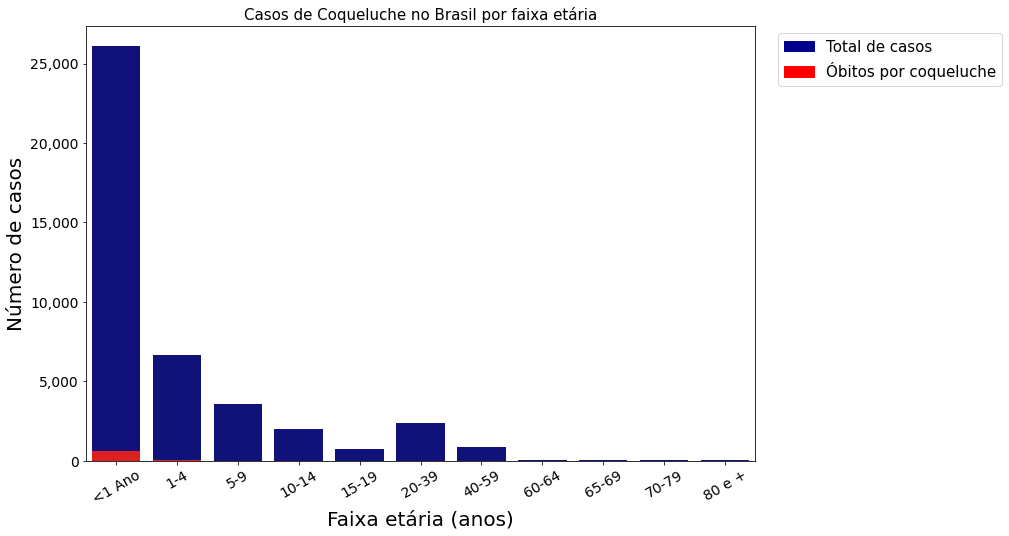

In [14]:
plt.figure(figsize = (12,8))
plt.title("Casos de Coqueluche no Brasil por faixa etária", fontsize = 15)
bar1 = sns.barplot(data = coq_eta, x = coq_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = coq_eta, x = coq_eta.index, y = "Óbito", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Faixa etária (anos)", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

#legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "red", label = "Óbitos por coqueluche")
plt.legend(handles = [b1,b2], bbox_to_anchor = (1.38,1), fontsize = 15)

plt.show()

Muda bastante de figura com relação ao que vimos para tuberculose, não? 
Como vimos anteriormente, a coqueluche é uma doença muito mais agressiva em crianças menores de 1 ano de idade. Outro fator que colabora para esse dado é que, na verdade, casos de coqueluche em adultos são facilmente [confundidos com gripes e resfriados](https://saude.abril.com.br/bem-estar/coqueluche-por-que-os-adultos-devem-se-preocupar-com-ela/). Como a imunidade da coqueluche não é duradoura, uma fonte de infecção comum é adultos infectados transmitindo para os recém-nascidos, ainda não vacinados. Por isso é tão importante a cautela com recém-nascidos, e que a vacinação ocorra assim que possível, iniciada por volta dos 2 meses de idade.

# Tétano

Por último, falaremos sobre o tétano, outra doença potencialmente letal, cuja imunização é contemplada pelas vacinas DTP/Tetra/Pentavalente e Duplo Adulto. O tétano é uma doença que afeta o sistema nervoso, provocando fortes espasmos, que podem levar a rompimento de músculos, ossos quebrados e, em casos mais raros, afetar diretamente nervos e músculos da cabeça. O tétano é contraído através da infecção da bactéria *Clostridium tetani*, que está [presente no solo e metais enferrujados](https://www.who.int/news-room/fact-sheets/detail/tetanus), e penetra principalmente em ferimentos na pele.

Se não tratada, a evolução da doença para quadros graves é rápida e fatal. Devido as condições das infecção, está muito associada com [acidentes de trabalho](https://www.scielo.br/j/rbti/a/YjVxvFkYYNvZRMnXFf5J3Wb/?lang=pt) e locais com pouca higiene. Já vimos a cobertura das vacinas associadas anteriormente, então vamos olhar para as séries históricas da doença:

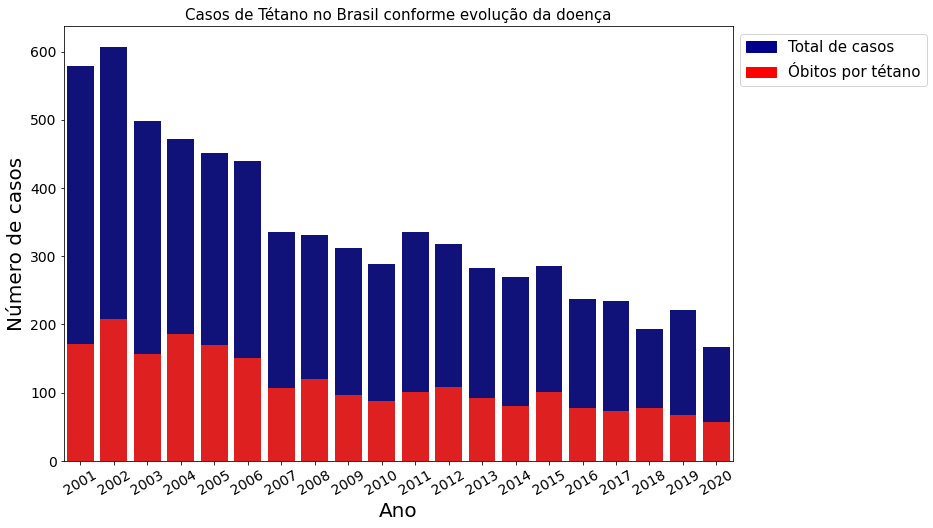

In [15]:
plt.figure(figsize = (12, 8))
plt.title("Casos de Tétano no Brasil conforme evolução da doença", fontsize = 15)
bar1 = sns.barplot(data = tet_ano, x = tet_ano.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tet_ano, x = tet_ano.index, y = "Óbito", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Ano", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

# legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "red", label = "Óbitos por tétano")
plt.legend(handles = [b1,b2], bbox_to_anchor = (1.3,1), fontsize = 15)

plt.show()

Como vimos, é uma doença com alta mortalidade. Felizmente, a tendência é de queda tanto no número total de casos quanto no número de óbitos decorrentes do tétano. Assim como vimos para o coqueluche, mesmo com poucos dados de vacinação para os últimos anos, temos bons indicadores gerais do controle da doença. O número de casos também é substancialmente menor que as outras doenças analisadas.

Por último, vamos olhar como a doença se comporta entre as diferentes faixas etárias:

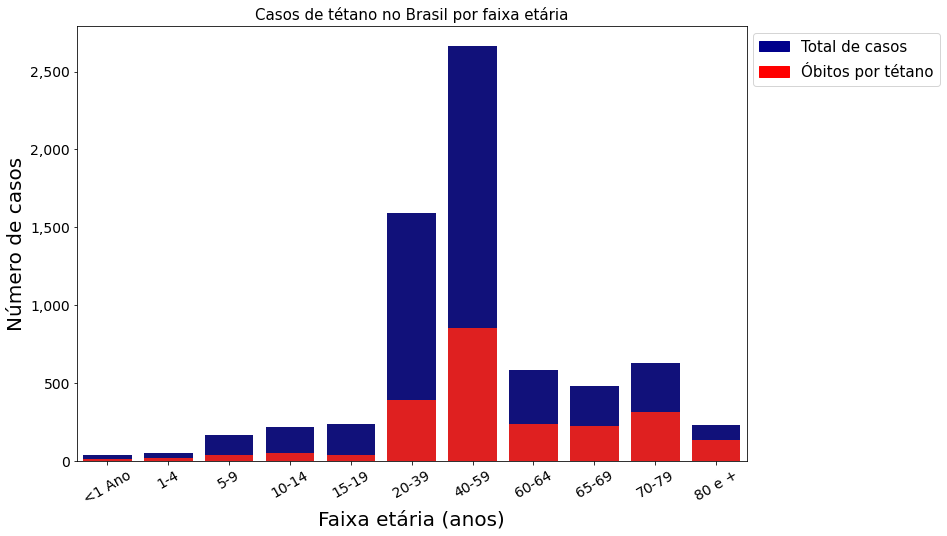

In [16]:
plt.figure(figsize = (12,8))
plt.title("Casos de tétano no Brasil por faixa etária", fontsize = 15)
bar1 = sns.barplot(data = tet_eta, x = tet_eta.index, y = "Total", color = "darkblue")
bar2 = sns.barplot(data = tet_eta, x = tet_eta.index, y = "Óbito", color = "red")
plt.ylabel("Número de casos", fontsize = 20)
plt.xlabel("Faixa etária (anos)", fontsize = 20)
bar1.tick_params(axis = "both", which = "major", labelsize = 14)
bar1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation = 30)

#legenda
b1 = mpatches.Patch(color = "darkblue", label = "Total de casos")
b2 = mpatches.Patch(color = "red", label = "Óbitos por tétano")
plt.legend(handles = [b1,b2], bbox_to_anchor = (1.3,1), fontsize = 15)

plt.show()

Nesse caso, ela assume um comportamento mais próximo do que vimos para a tuberculose, mas o tétano também é relativamente frequente em idades mais avançadas. A vacina Duplo Adulto é indicada [a cada 10 anos](https://www.pfizer.com.br/noticias/ultimas-noticias/adultos-devem-atualizar-caderneta-de-vacinacao) durante a idade adulta. Outro fator importante é que a infecção prévia não confere nenhuma imunidade, reforçando-se a necessidade de atualização constante da vacinação. Como vimos na série histórica das combinações de vacinas anti-tetânicas, de fato parece haver relativa baixa adesão da vacina Duplo Adulto (que tem meta de [100%!](https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf), o que poderia estar associada com a maior incidência e letalidade da doença em faixas etárias mais avançadas:

In [17]:
dt = ["Dupla adulto e tríplice acelular gestante"]
dt = cob_im_ano.iloc[:,np.r_[0,20:28]].query("Imuno in @dt").melt(id_vars = "Imuno").rename(columns = str.title)

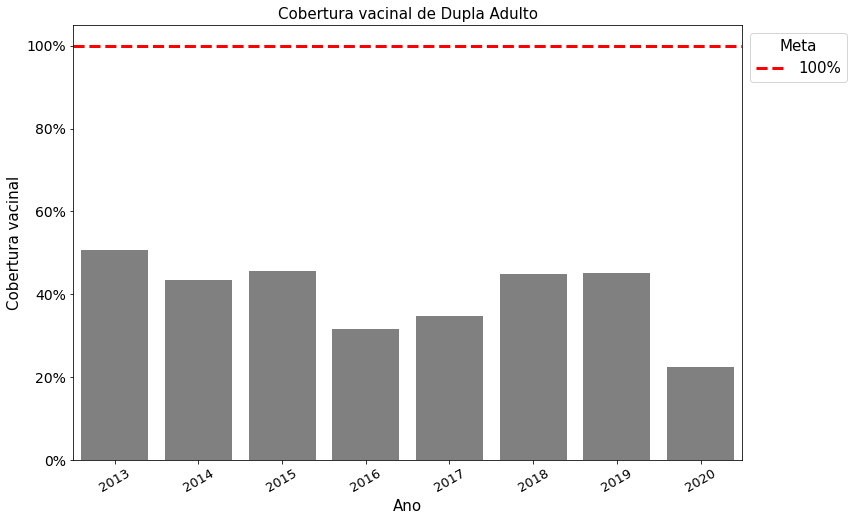

In [18]:
plt.figure(figsize = (12, 8))
plt.title("Cobertura vacinal de Dupla Adulto", fontsize = 15)
ax = sns.barplot(data = dt, x = "Variable", y = "Value", color = "grey")
plt.ylabel("Cobertura vacinal", fontsize = 15)
plt.xlabel("Ano", fontsize = 15)
ax.tick_params(axis = "x", which = "major", labelsize = 13)
ax.tick_params(axis = "y", which = "major", labelsize = 14)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())
plt.xticks(rotation = 30)
plt.axhline(y = 100, color = "red", linestyle = "--", lw = 3, label = "100%")
plt.legend(bbox_to_anchor = (1,1), fontsize = 15, title = "Meta", title_fontsize = 15)

plt.show()

# Conclusões

Neste nosso passeio por indicadores de doenças potencialmente letais e/ou incapacitantes, vimos que ainda há um longo caminho para a erradicação dessas doenças. Vimos que uma das doenças mais frequentes do mundo, e potencial causa de morte em diversos locais, a tuberculose, é presente no Brasil, mas a mortalidade é, de certa forma, controlada. O maior número de casos é associado com fatores de risco da população jovem-adulta. No outro espectro, vimos que uma outra doença respiratória, a coqueluche, tem uma incidência e mortalidade muito mais específica em recém-nascidos. Duas doenças respiratórias, mas de comportamento bastante diferentes, que, se não observadas e tendo sua vacinação descuidada, pode levar a aumentos no número de casos e novos surtos.

O tétano, doença infecciosa que atinge o sistema nervoso é a mais letal entre as doenças analisadas, mas devido às condições mais específicas da infecção, também é a doença com menor número de casos. 

Em suma, espero ter mostrado que a vacinação ainda é a forma mais efetiva que temos para evitar manifestações graves de muitas doenças, e que é importante não apenas a aplicação das vacinas nas crianças, mas também a manutenção do calendário de vacinas na vida adulta. Infelizmente, vimos que algumas dessas vacinas na idade adulta parecem ser negligenciadas no Brasil, não atingindo as metas necessárias para controle de doenças como o tétano.

# Referências

https://saude.abril.com.br/medicina/por-que-as-pessoas-estao-tomando-menos-vacina/

http://pni.datasus.gov.br/

https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(16)31678-6/fulltext#seccestitle200

https://www.thelancet.com/journals/lancet/home

https://www.paho.org/pt/noticias/9-12-2020-oms-revela-principais-causas-morte-e-incapacidade-em-todo-mundo-entre-2000-e

https://www.paho.org/bra/dmdocuments/covid-19-materiais-de-comunicacao-1/Alerta%20epidemiologico%20-%20Complicacoes%20e%20sequelas%20da%20COVID-19.pdf

https://saude.abril.com.br/medicina/tuberculose-o-que-e-sintomas-tipos-tratamentos-e-como-e-a-transmissao/

https://en.wikipedia.org/wiki/Tuberculosis

https://meucalendariodevacinas.com.br/educacao/bcg/

https://www.bio.fiocruz.br/index.php/br/coqueluche-sintomas-transmissao-e-prevencao

https://en.wikipedia.org/wiki/Whooping_cough#Prognosis

https://www.bio.fiocruz.br/index.php/br/tetano-sintomas-transmissao-e-prevencao#:~:text=O%20t%C3%A9tano%20%C3%A9%20uma%20infec%C3%A7%C3%A3o,um%20indiv%C3%ADduo%20para%20o%20outro.

https://meucalendariodevacinas.com.br/educacao/dtp-dtpa

https://en.wikipedia.org/wiki/Tetanus

https://www.em.com.br/app/noticia/bem-viver/2020/07/07/interna_bem_viver,1163194/em-meio-a-pandemia-pais-deixam-de-vacinar-os-filhos.shtml

https://www.scielo.br/j/jped/a/TCg8DMtnxLMtRfRvFb5QxZs/?lang=pt

https://www.msf.org.br/noticias/manifesto-de-tb-dr-e-entregue-na-assembleia-mundial-da-saude#:~:text=Na%20v%C3%A9spera%20de%20a%20Assembleia,melhoria%20de%20testes%20e%20cuidados

https://www.who.int/news-room/fact-sheets/detail/tetanus

https://pebmed.com.br/tuberculose-resistente-definicao-e-acoes-de-combate/

https://saude.abril.com.br/medicina/campanha-alerta-para-a-tuberculose-que-ainda-mata-milhares-por-dia/

https://antigo.saude.gov.br/images/pdf/2017/agosto/17/AACOBERTURAS-VACINAIS-NO-BRASIL---2010-2014.pdf

http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf

https://beepsaude.com.br/vacinas/vacina-pentavalente/

https://www.scielo.br/j/rbti/a/YjVxvFkYYNvZRMnXFf5J3Wb/?lang=pt

https://www.pfizer.com.br/noticias/ultimas-noticias/adultos-devem-atualizar-caderneta-de-vacinacao

http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11637

http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=30009921

http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=29878153

http://www2.datasus.gov.br/DATASUS/index.php?area=0203&id=31009407

http://tabnet.datasus.gov.br/tabdata/LivroIDB/2edrev/f13.pdf

https://saude.abril.com.br/bem-estar/coqueluche-por-que-os-adultos-devem-se-preocupar-com-ela/